In [58]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk import ngrams
from collections import Counter
from nltk import word_tokenize
import nltk
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("../Preparations/Data_for_EDA/df_ukraine_after.csv")

In [3]:
df

,article_title,author,published_time,article_text,article_category_one,article_category_two,picture_description,author_title,author_description,sentence_count,word_count,pos_count
0,US can no longer be perfunctory toward Guterre...,Global Times,2022-08-22,"Since this year, the United Nations (UN) has r...",OPINION,EDITORIAL,United Nations Secretary-General Antonio Guter...,Author details not found,Author details not found,36,850,<FreqDist with 16 samples and 486 outcomes>
1,Healthy and stable China-S.Korea ties depend o...,Wang Junsheng,2022-08-23,Wednesday marks the 30th anniversary of the es...,OPINION,VIEWPOINT,Illustration: Chen Xia/GT,Author details not found,Author details not found,27,735,<FreqDist with 15 samples and 424 outcomes>
2,"China’s power in the world, economically and p...",Global Times,2022-08-23,"Editor's Note: For Chinese people, the past de...",OPINION,VIEWPOINT,"Tower Bridge, London, the UK Photo:VCG",Author details not found,Author details not found,71,1606,<FreqDist with 17 samples and 810 outcomes>
3,Europe faces ‘coldest’ winter as energy crisis...,Qi Xijia,2022-08-23,A deepening energy crisis in Europe could put ...,SOURCE,ECONOMY,A coal-fired power plant operated by German en...,Author details not found,Author details not found,20,595,<FreqDist with 15 samples and 365 outcomes>
4,Severe drought in Europe ‘further expanding an...,AFP,2022-08-23,A severe drought hitting swathes of Europe is ...,WORLD,EUROPE,Picture description not found,Author details not found,Author details not found,13,332,<FreqDist with 15 samples and 201 outcomes>
...,...,...,...,...,...,...,...,...,...,...,...,...
484,US policy of ‘technological apartheid’ could l...,William Jones,2022-06-06,A New York Times article earlier this month do...,OPINION,VIEWPOINT,Illustration: Tang Tengfei/Global Times,Author details not found,Author details not found,29,765,<FreqDist with 16 samples and 392 outcomes>
485,US behind global grain crises: Chinese FM spok...,Global Times,2022-06-07,Zhao Lijian Photo: VCG Each global grain cris...,SOURCE,ECONOMY,Picture description not found,Author details not found,Author details not found,13,342,<FreqDist with 15 samples and 209 outcomes>
486,"‘No longer US’ backyard,’ Latin America sends ...",GT staff reporters,2022-06-07,Mexico's President Andres Manuel Lopez Obrador...,WORLD,AMERICAS,Picture description not found,Author details not found,Author details not found,28,1236,<FreqDist with 20 samples and 692 outcomes>
487,Chinese envoy warns against providing weapons ...,Xinhua,2022-06-07,A Chinese envoy on Monday warned against const...,CHINA,DIPLOMACY,Picture description not found,Author details not found,Author details not found,20,407,<FreqDist with 12 samples and 233 outcomes>


In [59]:
#tokenization
df['tokenized'] = df['article_text'].apply(str).apply(word_tokenize)
#remove punctuation
df['tokenized'] = df['tokenized'].apply(lambda x: [i for i in x if i.isalnum()])
#remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
df['tokenized'] = df['tokenized'].apply(lambda x: [i for i in x if i not in stopwords])

In [5]:
print(df['tokenized'][2])

['Editor', 'Note', 'For', 'Chinese', 'people', 'past', 'decade', 'epic', 'inspirational', 'The', 'country', 'leadership', 'Communist', 'Party', 'China', 'CPC', 'Central', 'Committee', 'Comrade', 'Xi', 'Jinping', 'core', 'made', 'great', 'endeavors', 'boosting', 'economy', 'deepening', 'reforms', 'improving', 'rights', 'people', 'acting', 'responsible', 'global', 'golden', 'era', 'relations', 'dimmed', 'significantly', 'past', 'years', 'London', 'chosen', 'follow', 'Washington', 'steps', 'closely', 'regard', 'Beijing', 'development', 'threat', 'interests', 'instead', 'reciprocal', 'partner', 'Why', 'British', 'politicians', 'keep', 'promoting', 'new', 'cold', 'war', 'China', 'Is', 'misunderstanding', 'UK', 'China', 'achievements', 'What', 'could', 'future', 'bilateral', 'relations', 'Andrew', 'Murray', 'Murray', 'former', 'communist', 'deputy', 'president', 'organization', 'Stop', 'War', 'Coalition', 'former', 'adviser', 'former', 'Labour', 'Party', 'leader', 'Jeremy', 'Corbyn', 'shared

In [60]:
#ngrams with count
n = 2
ngrams_list = []
for i in range(len(df)):
    ngrams_i = ngrams(df['tokenized'][i], n)
    ngrams_list += ngrams_i
ngrams_counter = Counter(ngrams_list)

ngrams_counted_list = []
for ngram, count in ngrams_counter.items():
    ngrams_str = ' '.join(ngram)
    ngrams_counted_list.append((ngrams_str, count))
ngrams_df = pd.DataFrame(ngrams_counted_list, columns=['ngram', 'count'])
ngrams_df

,ngram,count
0,Since year,1
1,year United,1
2,United Nations,74
3,Nations UN,6
4,UN repeatedly,1
...,...,...
164450,Moldova upgrade,1
164451,upgrade Free,1
164452,Area agreement,1
164453,agreement signed,1


In [6]:

#filter where 'ukraine' is in the ngram
ngrams_df[ngrams_df['ngram'].str.contains('NATO')]

,ngram,count
3546,de factor Asian version NATO,1
3547,factor Asian version NATO Berletic,1
3548,Asian version NATO Berletic Washington,1
3549,version NATO Berletic Washington reconfigured,1
3550,NATO Berletic Washington reconfigured presence,1
...,...,...
225540,caused trouble block process NATO,1
225541,trouble block process NATO key,1
225542,block process NATO key culprit,1
225543,process NATO key culprit Russia,1


In [7]:
#ngrams with count
from nltk import ngrams
n = 3
ngrams_list = []
for i in range(len(df)):
    ngrams_i = ngrams(df['tokenized'][i], n)
    ngrams_list += ngrams_i
ngrams_counter = Counter(ngrams_list)

ngrams_counted_list = []
for ngram, count in ngrams_counter.items():
    ngram_center = ngram[int(n/2)]
    ngrams = ' '.join(ngram)
    ngrams_counted_list.append((ngrams, count, ngram_center))
ngrams_df = pd.DataFrame(ngrams_counted_list, columns=['ngram', 'count', 'center'])

In [8]:
#filter where 'ukraine' is in the ngram
filter = ["EU","European", "Union", "Europe", "NATO"]
ngrams_df_plot = ngrams_df[ngrams_df['center'].isin(filter)]
ngrams_df_plot.sort_values(by='count', ascending=False)

,ngram,count,center
38642,European Union EU,18,Union
4864,Department European Studies,16,European
12526,many European countries,12,European
20590,US European countries,9,European
18567,The European Union,8,European
...,...,...,...
103369,invited NATO Summit,1,NATO
103375,motion NATO expansion,1,NATO
103381,review NATO history,1,NATO
103387,Western Europe Eastern,1,Europe


In [54]:
ngrams_df_table = ngrams_df_plot.sort_values(by='count', ascending=False).head(20)
max_words_len = [0, 0, 0]
lefts = []
centers = []
rights = []

for i in range(len(ngrams_df_table)):
    words = ngrams_df_table['ngram'].iloc[i].split()
    words_len = [0, 0, 0]
    center = str(ngrams_df_table['center'].iloc[i])
    left = ''
    right = ''
    j=0
    while words[j] != center:
        words_len[0] += len(words[j]) + 1
        left += words[j] + ' '
        j += 1
    words_len[1] = len(words[j]) + 1
    center = words[j] + ' '
    j += 1
    while j < len(words):
        words_len[2] += len(words[j]) + 1
        right += words[j] + ' '
        j += 1
    right = right[:-1]
    #print(right)
    for j in range(3):
        if words_len[j] > max_words_len[j]:
            max_words_len[j] = words_len[j]

    lefts.append(left)
    centers.append(center)
    rights.append(right)

print(max_words_len)
formated_ngrams = []
formeted_len = []
for i in range(len(ngrams_df_table)):
    formated_ngram = ''
    formated_ngram += lefts[i].rjust(max_words_len[0], " ")
    formated_ngram += centers[i].center(max_words_len[1], " ")
    formated_ngram += rights[i].ljust(max_words_len[2]-1, " ")
    #print(formated_ngram)
    formated_ngrams.append(formated_ngram)
    formeted_len.append(len(formated_ngram))

ngrams_df_table['formated_ngram'] = formated_ngrams
ngrams_df_table['formated_len'] = formeted_len
ngrams_df_table

[12, 9, 12]


,ngram,count,center,formated_ngram,formated_len
38642,European Union EU,18,Union,European Union EU,32
4864,Department European Studies,16,European,Department European Studies,32
12526,many European countries,12,European,many European countries,32
20590,US European countries,9,European,US European countries,32
18567,The European Union,8,European,The European Union,32
124097,applied EU membership,7,EU,applied EU membership,32
128048,within NATO become,6,NATO,within NATO become,32
128056,according NATO playbook,6,NATO,according NATO playbook,32
128064,regarding NATO predicament,6,NATO,regarding NATO predicament,32
128024,Note NATO constantly,6,NATO,Note NATO constantly,32


In [52]:
for i in range(len(ngrams_df_table)):
    print(ngrams_df_table['formated_ngram'].iloc[i])

   European   Union  EU         
 Department European Studies    
       many European countries  
         US European countries  
        The European Union      
    applied    EU    membership 
     within   NATO   become     
  according   NATO   playbook   
  regarding   NATO   predicament
       Note   NATO   constantly 
         G7   NATO   summits    
     attend   NATO   summit     
   articles   NATO   expanding  
     fellow European studies    
    Eastern European Central    
    Eastern European countries  
        The   NATO   alliance   
   conflict   NATO   adding     
perspective   NATO   eastward   
     Soviet   Union  US         


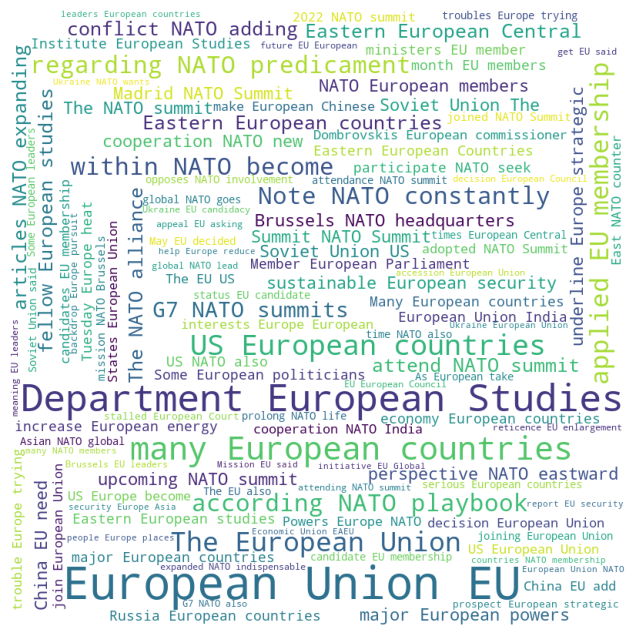

In [49]:
#bigrams wordcloud
ngrams_plot = ngrams_df_plot.set_index('ngram').to_dict()['count']
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate_from_frequencies(ngrams_plot)
plt.figure(figsize = (8, 8), facecolor = None)
plt.axis('off')
plt.imshow(wordcloud)

In [174]:
df['tokenized'] = df['article_text'].apply(str).apply(word_tokenize)
#remove punctuation
df['tokenized'] = df['tokenized'].apply(lambda x: [i for i in x if i.isalnum()])
# remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
df['tokenized'] = df['tokenized'].apply(lambda x: [i for i in x if i not in stopwords])

# ngrams with count
n = 2
ngrams_list = []

for i in range(len(df)):
    ngrams_i = ngrams(df['tokenized'][i], n)
    ngrams_list += ngrams_i
ngrams_counter = Counter(ngrams_list)
word_0 = []
word_1 = []
ngrams_counted_list = []
for ngram, count in ngrams_counter.items():
    word_0.append(ngram[0])
    word_1.append(ngram[1])
    ngrams_counted_list.append(count)
ngrams_df = pd.DataFrame({'word_0': word_0, 'word_1': word_1, 'count': ngrams_counted_list})
ngrams_df = ngrams_df.sort_values(by='count', ascending=False)
#count > 10
ngrams_df = ngrams_df[ngrams_df['count'] > 15]
#delete first row
ngrams_df = ngrams_df.iloc[1:]
#delate 'the'
ngrams_df = ngrams_df[ngrams_df['word_0'] != 'The']

top_ngrams = ngrams_df.head(20)
top_ngrams
#filtered_df = ngrams_df

,word_0,word_1,count
39458,Autonomous,Region,493
46938,Uyghur,Autonomous,481
46937,Xinjiang,Uyghur,481
1822,told,Global,417
742,Taiwan,question,235
1651,Hong,Kong,230
4418,Ukraine,crisis,209
530,South,Korea,203
503,Cold,War,154
493,two,countries,149


In [175]:
word_freq = pd.concat([top_ngrams['word_0'], top_ngrams['word_1']]).value_counts()
top_words = set(word_freq.index)

# Filter dataframe based on top words
filtered_df_0 = ngrams_df[ngrams_df['word_0'].isin(top_words) | ngrams_df['word_1'].isin(top_words)]

top_n=10
word_freq2 = pd.concat([filtered_df_0['word_0'], filtered_df_0['word_1']]).value_counts()
top_words2 = set(word_freq2.nlargest(top_n).index)
filtered_df = filtered_df_0[filtered_df_0['word_0'].isin(top_words2) | filtered_df_0['word_1'].isin(top_words2)]
filtered_df = filtered_df.sort_values(by='count', ascending=False).head(50)
filtered_df

,word_0,word_1,count
742,Taiwan,question,235
4418,Ukraine,crisis,209
530,South,Korea,203
493,two,countries,149
192,developing,countries,148
5842,China,US,133
72,Western,countries,131
34,international,community,121
3282,China,Russia,120
2751,Taiwan,Straits,114


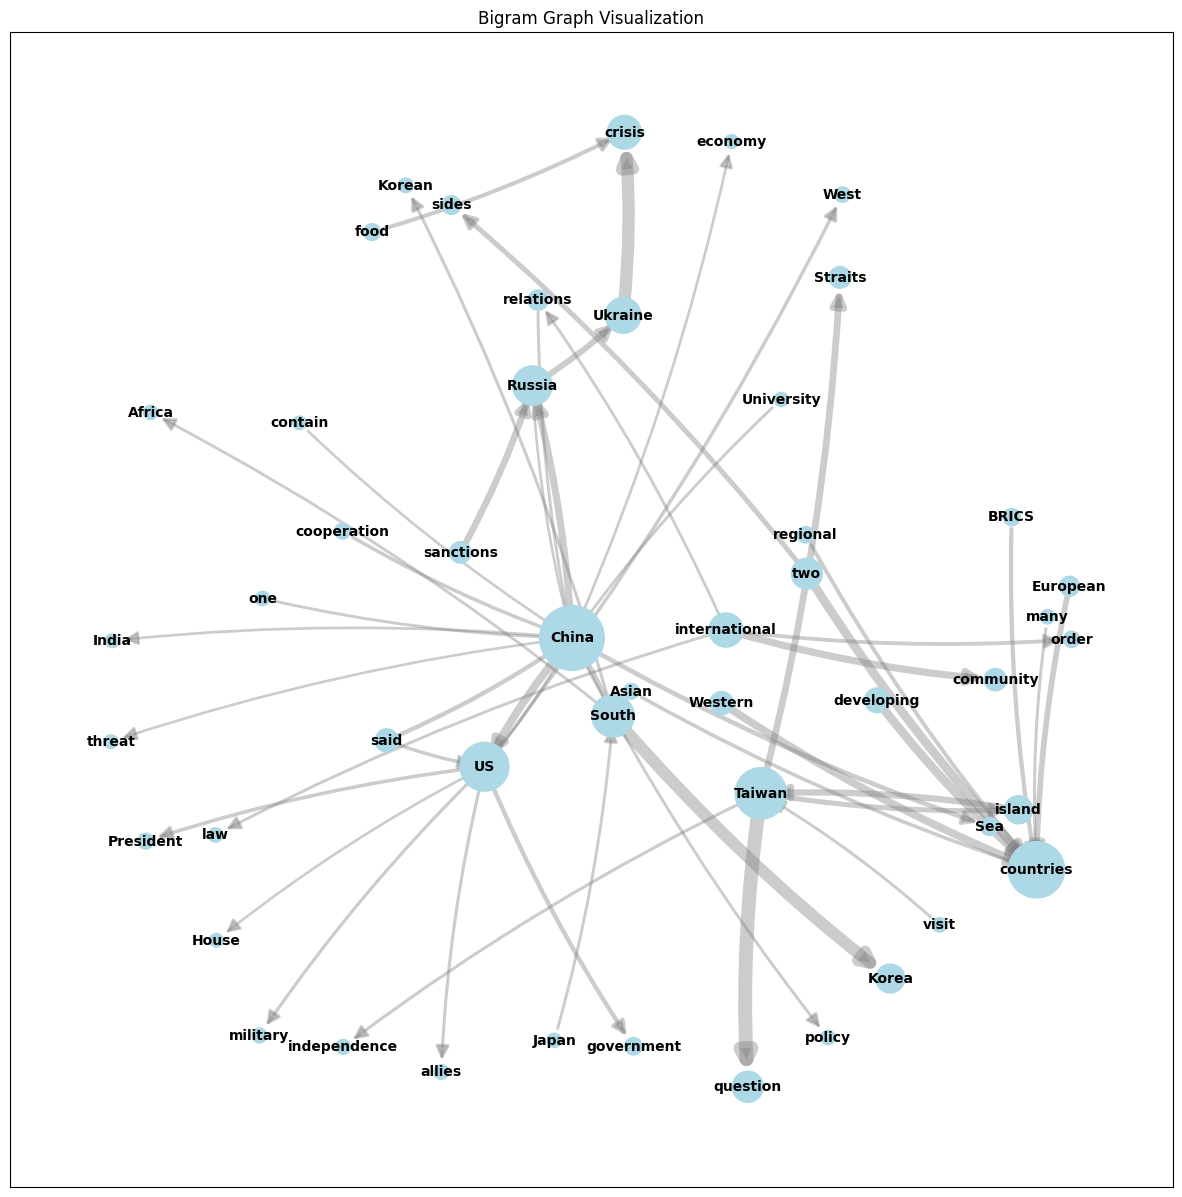

In [177]:
import networkx as nx
import math

# filtered_df = filtered_df.sort_values(by='count', ascending=False).head(50)
#normalized count
filtered_df['count'] = filtered_df['count'] / filtered_df['count'].max()
# Create directed graph
G = nx.DiGraph()

# Add edges with weights
for _, row in filtered_df.iterrows():
    G.add_edge(row['word_0'], row['word_1'], weight=(row['count'])*10)

# Compute node size based on degree (incoming + outgoing edges)
node_size = {node: (G.in_degree(node, weight='weight') + G.out_degree(node, weight='weight')) * 50 for node in
             G.nodes}

# Set up figure
plt.figure(figsize=(15, 15))

# Layout for visualization
pos = nx.spring_layout(G, k=0.9)  # Adjust k for better spacing
nx.draw_networkx_nodes(G, pos, node_size=[node_size[n] for n in G.nodes], node_color='lightblue',
                       edgecolors=None)

# Draw edges with thickness based on count
edges = nx.draw_networkx_edges(G, pos, arrowstyle='-|>', edge_color='gray', alpha=0.4,
                               width=[G[u][v]['weight'] for u, v in G.edges], connectionstyle='arc3,rad=0.05', arrowsize=20)

nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Display the graph
plt.title("Bigram Graph Visualization")
plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\lukas\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

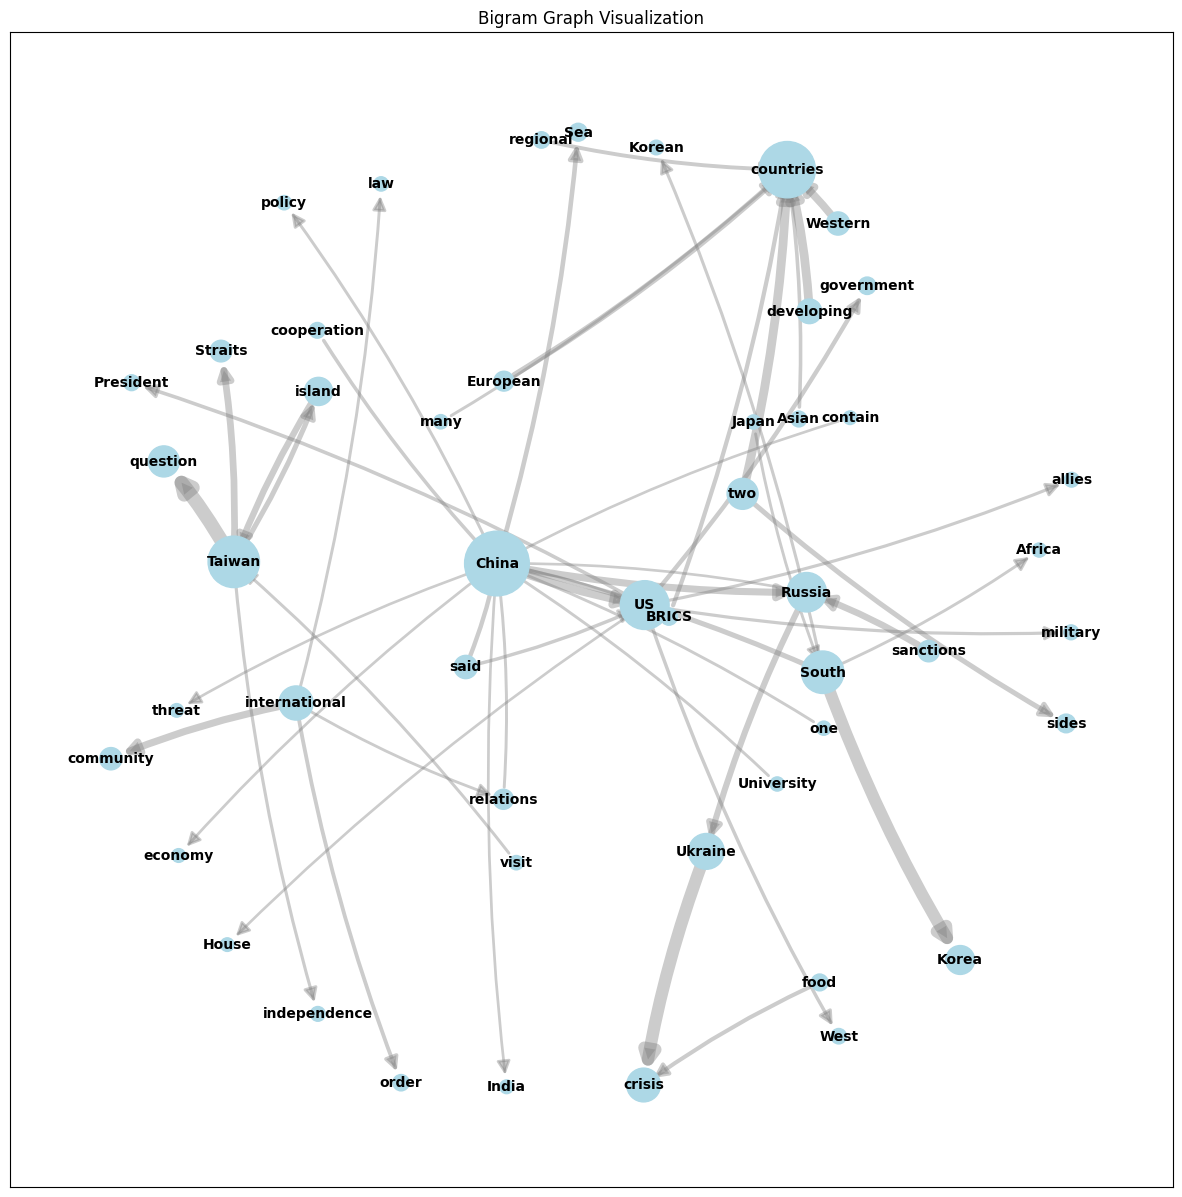

In [178]:
from NGrams_script import visualize_bigrams

visualize_bigrams(df)

In [180]:
from NGrams_script import concordance

concordance(df, ['NATO'], 3)

[12, 5, 13]


,ngram,count,center,formated_ngram,formated_len
128064,regarding NATO predicament,6,NATO,regarding NATO predicament,29
128024,Note NATO constantly,6,NATO,Note NATO constantly,29
128048,within NATO become,6,NATO,within NATO become,29
128056,according NATO playbook,6,NATO,according NATO playbook,29
112980,G7 NATO summits,5,NATO,G7 NATO summits,29
103320,articles NATO expanding,4,NATO,articles NATO expanding,29
103260,The NATO alliance,4,NATO,The NATO alliance,29
103248,conflict NATO adding,4,NATO,conflict NATO adding,29
117849,attend NATO summit,4,NATO,attend NATO summit,29
136606,upcoming NATO summit,3,NATO,upcoming NATO summit,29
